<a href="https://colab.research.google.com/github/ohikouta/transformers/blob/main/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install transformers 
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from transformers import pipeline, set_seed

In [10]:
generator = pipeline('text-generation', model='rinna/japanese-gpt2-small')

In [11]:
generator("私は大学生になりました。", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[{'generated_text': '私は大学生になりました。今は毎日楽しいです。そして最近は休日です。私のために。 私はいつもあなたのための時間です。私は'},
 {'generated_text': '私は大学生になりました。 アルバイトをする気もなく、バイト代も稼げなくてただひたすら一人で悶々と過ごしていました・・・ 今'},
 {'generated_text': '私は大学生になりました。しかし、両親は大学進学を諦め、大学を退学して、バイトで収入を得てから大学院を修了しました。'},
 {'generated_text': '私は大学生になりました。 友達にはなりましたが、私は就職は初めてだったのでいろいろ不安でした。 私は大学1年から社会人'},
 {'generated_text': '私は大学生になりました。 ちょうど10年前のこと。 私は高校時代友達を2人も亡くしてしまっており、一人暮らしをしてからというもの、'}]

In [12]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been
sent an action figure of Megatron instead! As a lifelong enemy of the Deceptions, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus
Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [13]:
from transformers import pipeline
import pandas as pd

classifier = pipeline("text-classification")

outputs = classifier(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,label,score
0,NEGATIVE,0.840621


In [14]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,ORG,0.909210,Amazon,5,11
1,MISC,0.992894,Optimus Prime,36,49
2,LOC,0.999753,Germany,90,97
3,MISC,0.600473,Mega,208,212
4,PER,0.579169,##tron,212,216
5,ORG,0.804419,Deceptions,253,263
6,MISC,0.797819,Megatron,349,357
7,MISC,0.991361,Optimus Prime,366,379
8,PER,0.803698,Bumblebee,501,510


In [17]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 10.2 MB/s 
     |████████████████████████████████| 212 kB 66.0 MB/s 
     |████████████████████████████████| 115 kB 59.9 MB/s 
     |████████████████████████████████| 127 kB 56.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [18]:
# hubで利用可能なデータセットの確認
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 11853 datasets currently available on the hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [19]:
from datasets import load_dataset
emotions = load_dataset("emotion")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [21]:
train_ds = emotions["train"]
print(train_ds)

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})


In [22]:
len(train_ds)

16000

In [23]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [24]:
train_ds.column_names

['text', 'label']

In [25]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [26]:
print(train_ds[:5])
print(train_ds["text"][:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [27]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [29]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

# apply 各要素に関数を実行
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


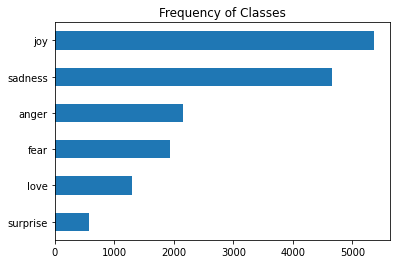

In [30]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


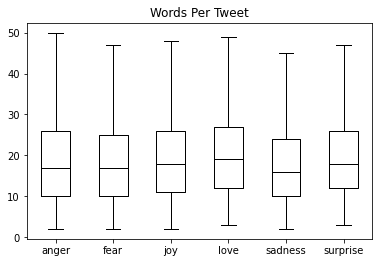

In [34]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
           showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [35]:
# DataFrameはここまで，データセットの出力形式をリセット
emotions.reset_format()